In [3]:
import cv2 as cv
import numpy as np

# Initialize list to store points and a counter
points = []
N = 4  # Number of points to select

# Load images
building_image = cv.imread('005.jpg')
flag_image = cv.imread('flag.png')

# Mouse callback function to select points
def selecting_points(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN and len(points) < N:
        # Append the selected point to the list
        points.append((x, y))
        # Draw a small circle where the point was selected
        cv.circle(building_image, (x, y), 5, (0, 0, 255), -1)
        # Display the updated image with selected points
        cv.imshow('Building', building_image)
        # Close the window after selecting 4 points
        if len(points) == N:
            cv.destroyAllWindows()

# Create a window to display the image
cv.namedWindow('Building', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Building', selecting_points)

# Display the image and wait for the user to select points
while len(points) < N:
    cv.imshow('Building', building_image)
    if cv.waitKey(1) & 0xFF == 27:  # Exit if 'Esc' key is pressed
        break

cv.destroyAllWindows()

# Output the selected points
print("Selected points:", points)




Selected points: [(219, 153), (200, 534), (463, 542), (465, 305)]


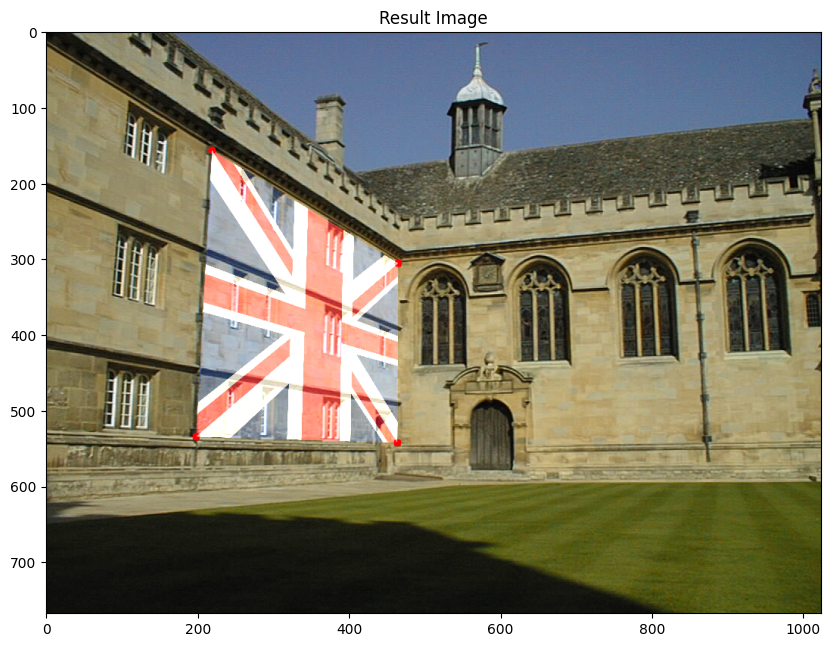

In [5]:
import cv2
import matplotlib.pyplot as plt
dst_points = np.array(points, dtype=np.float32)  # Ensure points are float32

# Step 2: Define source points (corners of the flag image)
h, w = flag_image.shape[:2]
src_points = np.array([(0, 0), (w, 0), (w, h), (0, h)], dtype=np.float32)

# Step 3: Compute homography
H, _ = cv2.findHomography(src_points, dst_points)

# Step 4: Warp the flag image using the computed homography
warped_flag = cv2.warpPerspective(flag_image, H, (building_image.shape[1], building_image.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv2.addWeighted(building_image, 1, warped_flag, 0.7, 0)

# Step 5: Create a mask for the warped flag
gray_warped = cv2.cvtColor(warped_flag, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()

In [1]:
import cv2 as cv
import numpy as np

# Initialize list to store points and a counter
points = []
N = 4  # Number of points to select

# Load images
classical_art = cv.imread('Galle-Fort-Clock-Tower (1).jpg')


# Mouse callback function to select points
def selecting_points(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN and len(points) < N:
        # Append the selected point to the list
        points.append((x, y))
        # Draw a small circle where the point was selected
        cv.circle(classical_art, (x, y), 5, (0, 0, 255), -1)
        # Display the updated image with selected points
        cv.imshow('Building', classical_art)
        # Close the window after selecting 4 points
        if len(points) == N:
            cv.destroyAllWindows()

# Create a window to display the image
cv.namedWindow('Building', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Building', selecting_points)

# Display the image and wait for the user to select points
while len(points) < N:
    cv.imshow('Building', classical_art)
    if cv.waitKey(1) & 0xFF == 27:  # Exit if 'Esc' key is pressed
        break

cv.destroyAllWindows()

# Output the selected points
print("Selected points:", points)

Selected points: [(386, 190), (464, 199), (480, 431), (377, 435)]


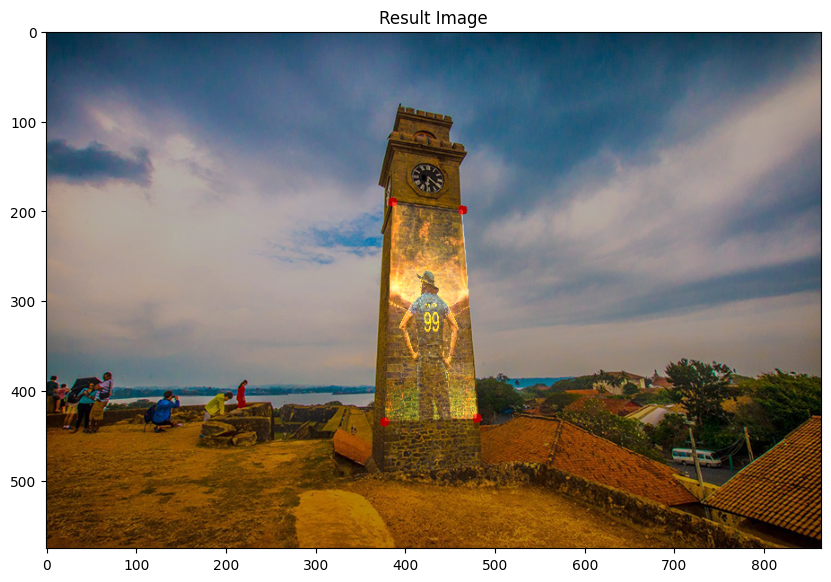

In [7]:
import cv2
import matplotlib.pyplot as plt
dst_points = np.array(points, dtype=np.float32)  # Ensure points are float32

flag_image = cv.imread('crick.jpg')
# Step 2: Define source points (corners of the flag image)
h, w = flag_image.shape[:2]
src_points = np.array([(0, 0), (w, 0), (w, h), (0, h)], dtype=np.float32)

# Step 3: Compute homography
H, _ = cv2.findHomography(src_points, dst_points)

# Step 4: Warp the flag image using the computed homography
warped_flag = cv2.warpPerspective(flag_image, H, (classical_art.shape[1], classical_art.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv2.addWeighted(classical_art, 0.7, warped_flag, 0.7, 0)
# Step 5: Create a mask for the warped flag
gray_warped = cv2.cvtColor(warped_flag, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()

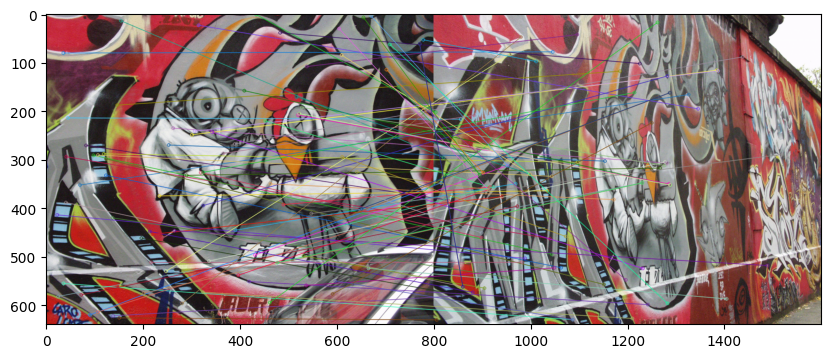

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
img1 = cv2.imread('img1.ppm')
img5 = cv2.imread('img5.ppm')

# Compute SIFT features
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp5, des5 = sift.detectAndCompute(img5, None)

# Match the SIFT features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des5, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Visualize the matched features
img_matches = cv2.drawMatches(img1, kp1, img5, kp5, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches = cv2.cvtColor(img_matches,cv2.COLOR_BGR2RGB)

# Display the resulting image 
plt.figure(figsize=(10, 10))
plt.imshow(img_matches)
plt.show()


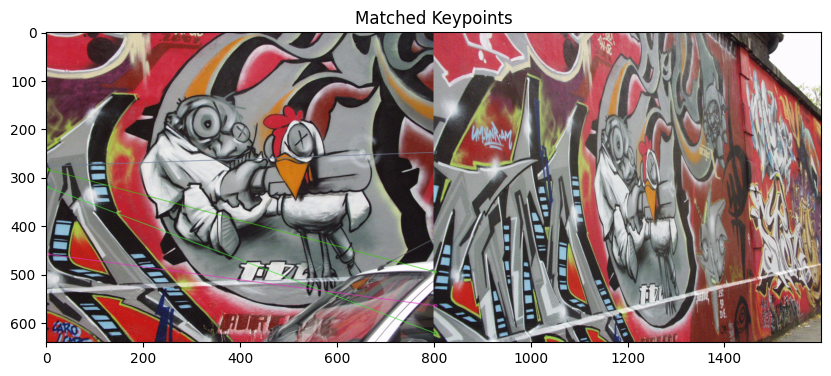

Computed Homography Matrix:
[[-1.51179143e-01 -8.26618707e-01  4.03351726e+02]
 [-1.23406361e-01 -6.27374218e-01  3.09596283e+02]
 [-3.82734672e-04 -2.03991912e-03  1.00000000e+00]]
 
Loaded Homography Matrix:
[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


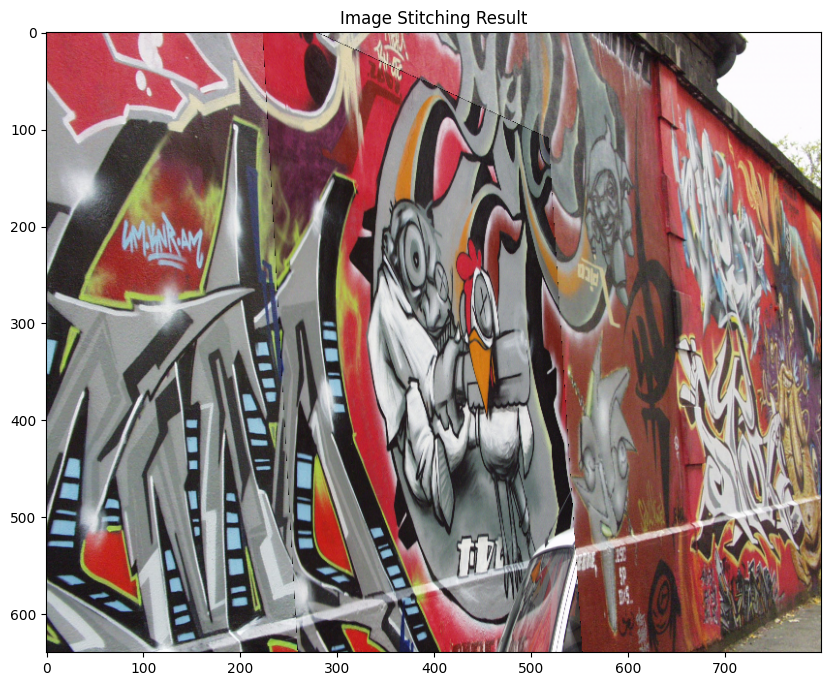

In [88]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def custom_ransac_feature_matching(image1, image2, iterations=1000, distance_threshold=10, min_match_inliers=100):
    # Initialize SIFT detector
    sift_detector = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    key_pts1, descriptors1 = sift_detector.detectAndCompute(image1, None)
    key_pts2, descriptors2 = sift_detector.detectAndCompute(image2, None)
    # Create a brute-force matcher for descriptor matching
    matcher = cv2.BFMatcher()
    optimal_matches = []  # Store the optimal matches found using RANSAC
    optimal_homography = None  # Store the homography matrix from the best model
    optimal_inliers = []  # Store the inliers of the best transformation

    for _ in range(iterations):
        # Randomly select four points for homography estimation
        selected_matches = random.sample(range(len(key_pts1)), 4)

        # Extract corresponding keypoints for the selected matches
        src_points = np.float32([key_pts1[m].pt for m in selected_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([key_pts2[m].pt for m in selected_matches]).reshape(-1, 1, 2)

        # Compute homography matrix between the randomly selected points
        h_matrix, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, distance_threshold)

        # Apply the computed homography to the source points (image1 keypoints)
        transformed_points = cv2.perspectiveTransform(src_points, h_matrix)

        # Calculate Euclidean distances between transformed keypoints and actual keypoints in image2
        errors = np.sqrt(np.sum((dst_points - transformed_points) ** 2, axis=2))

        # Count the number of inliers (points where error is within threshold)
        inlier_count = np.count_nonzero(errors < distance_threshold)

        # Update the best model if it has more inliers
        if inlier_count > len(optimal_inliers):
            optimal_inliers = errors < distance_threshold
            optimal_matches = selected_matches
            optimal_homography = h_matrix
        # Stop if enough inliers are found
        if inlier_count >= min_match_inliers:
            break

    # Filter the matches based on the inliers
    filtered_match_results = [cv2.DMatch(i, i, 0) for i, is_inlier in enumerate(optimal_inliers) if is_inlier]
    return filtered_match_results, optimal_homography, key_pts1, key_pts2





# Use the custom RANSAC-based feature matching function
match_results, homography_matrix, key_pts1, key_pts2 = custom_ransac_feature_matching(img1, img5)

# Visualize the matches between image1 and image5
visualized_matches = cv2.drawMatches(img1, key_pts1, img5, key_pts2, match_results, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matching points
plt.figure(figsize=(10, 10))
plt.title('Matched Keypoints')
plt.imshow(cv2.cvtColor(visualized_matches, cv2.COLOR_BGR2RGB))
plt.show()

print("Computed Homography Matrix:")
print(homography_matrix)

print(" ")

# Load homography matrix from file
loaded_homography = np.loadtxt(r"H1to5p.txt")

# Print the original homography matrix from file
print("Loaded Homography Matrix:")
print(loaded_homography)

# Warp image1 onto image5 using the loaded homography matrix
warped_image1 = cv2.warpPerspective(img1, loaded_homography, (img5.shape[1], img5.shape[0]))

# Create a binary mask of the warped image
_, warp_mask = cv2.threshold(cv2.cvtColor(warped_image1, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)

# Invert the mask to isolate the region where the warped image1 will be placed on image5
inverse_mask_img5 = cv2.bitwise_not(warp_mask)

# Blend image1 with image5 using the computed masks
blended_image = cv2.bitwise_and(img5, img5, mask=inverse_mask_img5)
blended_image = cv2.add(blended_image, warped_image1)

# Display the stitched result
plt.figure(figsize=(10, 10))
plt.title('Image Stitching Result')
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.show()
